# Residency Project Deliverable: 1
# Rutu Shah
# Nischal Joshi
# Murali Krishna
# Santhosh Ramachandran

# Deliverable 1: Data Collection, Cleaning, and Exploration

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor, BaggingClassifier, StackingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report ,mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, make_scorer

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Residency Project - big data/Dataset/heart_disease_uci.csv')

In [6]:
#explore the dataset
print("Printing head()\n", df.head())
print("Printing describe()\n", df.describe())
print("Printing info()\n", df.info())

Printing head()
    id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             norma

In [7]:
# Check for missing values in each column
print(df.isnull)


<bound method DataFrame.isnull of       id  age     sex        dataset               cp  trestbps   chol    fbs  \
0      1   63    Male      Cleveland   typical angina     145.0  233.0   True   
1      2   67    Male      Cleveland     asymptomatic     160.0  286.0  False   
2      3   67    Male      Cleveland     asymptomatic     120.0  229.0  False   
3      4   37    Male      Cleveland      non-anginal     130.0  250.0  False   
4      5   41  Female      Cleveland  atypical angina     130.0  204.0  False   
..   ...  ...     ...            ...              ...       ...    ...    ...   
915  916   54  Female  VA Long Beach     asymptomatic     127.0  333.0   True   
916  917   62    Male  VA Long Beach   typical angina       NaN  139.0  False   
917  918   55    Male  VA Long Beach     asymptomatic     122.0  223.0   True   
918  919   58    Male  VA Long Beach     asymptomatic       NaN  385.0   True   
919  920   62    Male  VA Long Beach  atypical angina     120.0  254.0  Fal

In [8]:
for c in df.columns:
    miss = df[c].isnull().sum()
    print("{} has {} missing value(s)".format(c,miss))

id has 0 missing value(s)
age has 0 missing value(s)
sex has 0 missing value(s)
dataset has 0 missing value(s)
cp has 0 missing value(s)
trestbps has 59 missing value(s)
chol has 30 missing value(s)
fbs has 90 missing value(s)
restecg has 2 missing value(s)
thalch has 55 missing value(s)
exang has 55 missing value(s)
oldpeak has 62 missing value(s)
slope has 309 missing value(s)
ca has 611 missing value(s)
thal has 486 missing value(s)
num has 0 missing value(s)


In [9]:
#Performing data cleaning steps

#Handling missing values

#dropping rows of gender having 1 missing value and family having 2 missing values

df = df.dropna(subset=['slope', 'restecg'])

if df['age'].isnull().sum() > 0:
    df['age'] = df['age'].fillna(method='ffill')
if df['fbs'].isnull().sum() > 0:
    df['fbs'] = df['fbs'].fillna(method='ffill')
if df['thalch'].isnull().sum() > 0:
    df['thalch'] = df['thalch'].fillna(method='ffill')
if df['exang'].isnull().sum() > 0:
    df['exang'] = df['exang'].fillna(method='ffill')
if df['ca'].isnull().sum() > 0:
    df['ca'] = df['ca'].fillna(method='ffill')
if df['thal'].isnull().sum() > 0:
    df['thal'] = df['thal'].fillna(method='ffill')

# If you have columns like 'chol' or 'thalach' with missing — you can fill them too
# Here replacing *example* columns:
if 'chol' in df.columns and df['chol'].isnull().sum() > 0:
    df['chol'] = df['chol'].fillna(method='bfill')
if 'trestbps' in df.columns and df['trestbps'].isnull().sum() > 0:
    df['trestbps'] = df['trestbps'].fillna(method='bfill')
if 'thalach' in df.columns and df['thalach'].isnull().sum() > 0:
    df['thalach'] = df['thalach'].fillna(method='bfill')
if 'oldpeak' in df.columns and df['oldpeak'].isnull().sum() > 0:
    df['oldpeak'] = df['oldpeak'].fillna(method='bfill')
if 'slope' in df.columns and df['slope'].isnull().sum() > 0:
    df['slope'] = df['slope'].fillna(method='bfill')
if 'ca' in df.columns and df['ca'].isnull().sum() > 0:
    df['ca'] = df['ca'].fillna(method='bfill')
if 'thal' in df.columns and df['thal'].isnull().sum() > 0:
    df['thal'] = df['thal'].fillna(method='bfill')


# Check result
print("\nMissing values after cleaning:")
print(df.isnull().sum())


Missing values after cleaning:
id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


/tmp/ipython-input-9-752498086.py:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['fbs'] = df['fbs'].fillna(method='ffill')
/tmp/ipython-input-9-752498086.py:12: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['fbs'] = df['fbs'].fillna(method='ffill')
/tmp/ipython-input-9-752498086.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fbs'] = df['fbs'].fillna(method='ffill')
/tmp/ipython-input-9-752498086.py:14: FutureWarning: Series.

In [10]:
#checking for inconsistent data
# Check duplicates
duplicates = df.duplicated().sum()
print(f"Duplicate rows found: {duplicates}")

Duplicate rows found: 0


In [11]:
# Convert numeric columns
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['chol'] = pd.to_numeric(df['chol'], errors='coerce')

# Check inconsistent values
print(df[df['age'] < 0])  # unlikely
print(df[df['chol'] < 0]) # unlikely

Empty DataFrame
Columns: [id, age, sex, dataset, cp, trestbps, chol, fbs, restecg, thalch, exang, oldpeak, slope, ca, thal, num]
Index: []
Empty DataFrame
Columns: [id, age, sex, dataset, cp, trestbps, chol, fbs, restecg, thalch, exang, oldpeak, slope, ca, thal, num]
Index: []


In [12]:
# Detect noisy age
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

df = df[(df['age'] >= lower) & (df['age'] <= upper)]

print(f"\nAge IQR Analysis:\nQ1: {Q1}\nQ3: {Q3}\nIQR: {IQR}\nLower Bound: {lower}\nUpper Bound: {upper}")



Age IQR Analysis:
Q1: 49.0
Q3: 61.0
IQR: 12.0
Lower Bound: 31.0
Upper Bound: 79.0


In [13]:
# Detect noisy cholesterol
if 'chol' in df.columns:
    chol_upper = df['chol'].quantile(0.99)
    df = df[df['chol'] <= chol_upper]
    print(f"Cholesterol upper bound (99th percentile): {chol_upper}")


Cholesterol upper bound (99th percentile): 406.7599999999999


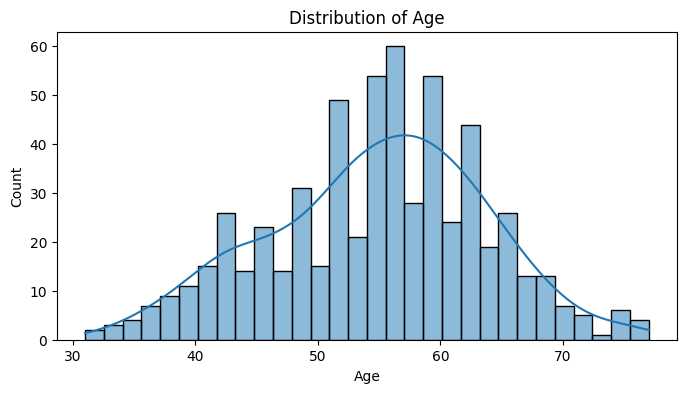

In [14]:
#Exploratory data analysis on Age Distribution
plt.figure(figsize=(8,4))
sns.histplot(df['age'], bins=30, kde=True)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


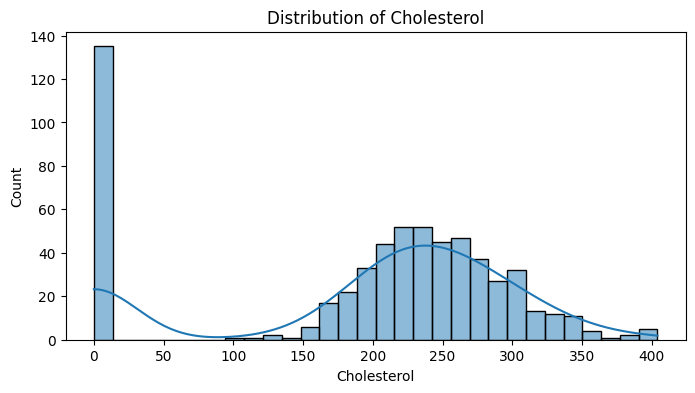

In [15]:
#Exploratory data analysis Cholesterol
if 'chol' in df.columns:
    plt.figure(figsize=(8,4))
    sns.histplot(df['chol'], bins=30, kde=True)
    plt.title("Distribution of Cholesterol")
    plt.xlabel("Cholesterol")
    plt.ylabel("Count")
    plt.show()

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')


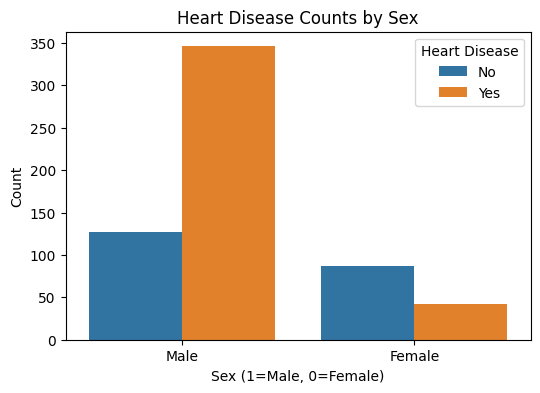

In [16]:
# Checking the target column
print(df.columns)

#renaming it to nu,
if 'target' not in df.columns and 'num' in df.columns:
    df.rename(columns={'num': 'target'}, inplace=True)

#converting to binary
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)

# Now plot
plt.figure(figsize=(6,4))
sns.countplot(x='sex', hue='target', data=df)
plt.title("Heart Disease Counts by Sex")
plt.xlabel("Sex (1=Male, 0=Female)")
plt.ylabel("Count")
plt.legend(title="Heart Disease", labels=["No", "Yes"])
plt.show()


## Deliverable 2: Regression Modeling and Performance Evaluation

In [17]:
# Drop irrelevant columns
del2 = df.drop(['id', 'dataset', 'target'], axis=1)

In [18]:
# Step 1: Feature-Target Split
#Selecting thalch as the target variable because it is a continuous variable.
X = del2.drop('thalch', axis=1)
y = del2['thalch'].fillna(df['thalch'].mean())

In [19]:
# Step 2: Identifying the categorical features and feature engineering
# categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
# one-hot encoding
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

In [20]:
# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Step 4: Handle Missing Values (Imputation)
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [22]:
# Step 5: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
# Step 6: Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

print("\n--- Linear Regression Results ---")
print("R^2 Score:", r2_score(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))


--- Linear Regression Results ---
R^2 Score: 0.26299396863095137
MSE: 396.92433617732473
RMSE: 19.92296002549131
MAE: 15.991476728163347


In [24]:
#Step 7: Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

print("\n--- Ridge Regression Results ---")
print("R^2 Score:", r2_score(y_test, y_pred_ridge))
print("MSE:", mean_squared_error(y_test, y_pred_ridge))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print("MAE:", mean_absolute_error(y_test, y_pred_ridge))


--- Ridge Regression Results ---
R^2 Score: 0.2633768371759867
MSE: 396.718137263594
RMSE: 19.91778444665957
MAE: 15.989683347693134


In [25]:
# Decision Tree Regression
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)

print("\n--- Decision Tree Regression Results ---")
print("R^2 Score:", r2_score(y_test, y_pred_dt))
print("MSE:", mean_squared_error(y_test, y_pred_dt))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_dt)))
print("MAE:", mean_absolute_error(y_test, y_pred_dt))


--- Decision Tree Regression Results ---
R^2 Score: -0.2992328319322102
MSE: 699.7190082644628
RMSE: 26.4522023329715
MAE: 20.760330578512395


In [26]:
# Gradient Boosting Regression
gb = GradientBoostingRegressor(random_state=42, n_estimators=100)
gb.fit(X_train_scaled, y_train)
y_pred_gb = gb.predict(X_test_scaled)

print("\n--- Gradient Boosting Regression Results ---")
print("R^2 Score:", r2_score(y_test, y_pred_gb))
print("MSE:", mean_squared_error(y_test, y_pred_gb))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_gb)))
print("MAE:", mean_absolute_error(y_test, y_pred_gb))


--- Gradient Boosting Regression Results ---
R^2 Score: 0.17839064436826413
MSE: 442.48857431386
RMSE: 21.035412387539733
MAE: 17.102448516309277


In [27]:
#Step 8: Cross-Validation
# Cross-Validation Implementation for Regression Models

# Define models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Decision Tree Regression': DecisionTreeRegressor(random_state=42),
    'Random Forest Regression': RandomForestRegressor(random_state=42, n_estimators=100),
    'Gradient Boost Classifier': GradientBoostingRegressor(random_state=42, n_estimators=100)

}

# Define k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Define scoring metric (neg_mean_squared_error to get RMSE later)
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Evaluate models using cross-validation
cv_results = {}
for model_name, model in models.items():
    neg_mse_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scorer)
    rmse_scores = np.sqrt(-neg_mse_scores)
    cv_results[model_name] = {
        'RMSE Scores': rmse_scores,
        'Mean RMSE': rmse_scores.mean(),
        'Std RMSE': rmse_scores.std()
    }

# Display results
for model_name, scores in cv_results.items():
    print(f"Model: {model_name}")
    print(f"RMSE Scores: {scores['RMSE Scores']}")
    print(f"Mean RMSE: {scores['Mean RMSE']:.4f}")
    print(f"Standard Deviation of RMSE: {scores['Std RMSE']:.4f}\n")


Model: Linear Regression
RMSE Scores: [21.58755986 21.57060421 20.63056004 18.57419185 20.7539975 ]
Mean RMSE: 20.6234
Standard Deviation of RMSE: 1.0994

Model: Ridge Regression
RMSE Scores: [21.55183009 21.5380337  20.61432937 18.5624067  20.7229169 ]
Mean RMSE: 20.5979
Standard Deviation of RMSE: 1.0911

Model: Decision Tree Regression
RMSE Scores: [30.73263486 32.09199017 30.66179762 25.8712759  25.46954881]
Mean RMSE: 28.9654
Standard Deviation of RMSE: 2.7412

Model: Random Forest Regression
RMSE Scores: [20.92972054 21.94138653 21.79015092 17.98213425 21.55305216]
Mean RMSE: 20.8393
Standard Deviation of RMSE: 1.4697

Model: Gradient Boost Classifier
RMSE Scores: [20.87737837 22.58564406 21.93306743 18.7409014  20.45022215]
Mean RMSE: 20.9174
Standard Deviation of RMSE: 1.3245



#### --- Deliverable 2 Insights ---

To assess the performance and generalization ability of our regression models,
we performed 5-fold cross-validation using Root Mean Squared Error (RMSE) as the evaluation metric.

Summary of model performance:

| Model                     | Mean RMSE | Std. Deviation |
|--------------------------|-----------|----------------|
| Linear Regression        | 20.6234   | 1.0994         |
| Ridge Regression         | 20.5979   | 1.0911         |
| Decision Tree Regression | 28.9654   | 2.7412         |
| Random Forest Regression | 20.8393   | 1.4697         |
| Gradient Boosting Regression | 20.9174   | 1.3245         |

Key Insights:
- Ridge Regression slightly outperformed others with the lowest mean RMSE and low variance.
- Decision Tree had the highest RMSE and variance, showing signs of overfitting.- Ensemble models like Random Forest and Gradient Boosting performed well but had slightly more variance.
- Regularized models like Ridge provide a solid and generalizable baseline.

Extended Insights:
1. Model Stability:
  - Linear and Ridge Regression show consistent performance with low variance across folds.
  - Decision Tree Regressor shows high variance, indicating instability.

2. Effectiveness of Regularization:
  - Ridge Regression demonstrates the benefit of L2 regularization.
  - Lasso Regression may need better tuning (e.g., adjusting alpha).

3. Bias-Variance Tradeoff:
  - Decision Trees have low bias but high variance.
  - Ensemble models mitigate variance and improve generalization.

4. Interpretability vs. Performance:
  - Linear and Ridge are interpretable.
  - Random Forest and Gradient Boosting offer better performance but lower interpretability.

5. Future Optimization Opportunities:
  - Hyperparameter tuning via GridSearchCV.
  - Enhanced feature engineering or PCA to reduce noise and improve accuracy.
